# 房价预测

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('load_kc_house_data.csv')

In [3]:
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [10]:
features= ['bathrooms','view','bedrooms','condition','sqft_living']

In [12]:
data_new = data[features]

In [15]:
data_new['price'] = data['price']

C:\Users\Haihua Wang\AppData\Local\Temp\ipykernel_3656\1540845744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['price'] = data['price']


In [16]:
data_new

bathrooms  view  bedrooms  condition  sqft_living     price
0           1.00     0         3          3         1180  221900.0
1           2.25     0         3          3         2570  538000.0
2           1.00     0         2          3          770  180000.0
3           3.00     0         4          5         1960  604000.0
4           2.00     0         3          3         1680  510000.0
...          ...   ...       ...        ...          ...       ...
21608       2.50     0         3          3         1530  360000.0
21609       2.50     0         4          3         2310  400000.0
21610       0.75     0         2          3         1020  402101.0
21611       2.50     0         3          3         1600  400000.0
21612       0.75     0         2          3         1020  325000.0

[21613 rows x 6 columns]

## 探索性数据分析

In [17]:
data_new.describe()

bathrooms          view      bedrooms     condition   sqft_living  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       2.114757      0.234303      3.370842      3.409430   2079.899736   
std        0.770163      0.766318      0.930062      0.650743    918.440897   
min        0.000000      0.000000      0.000000      1.000000    290.000000   
25%        1.750000      0.000000      3.000000      3.000000   1427.000000   
50%        2.250000      0.000000      3.000000      3.000000   1910.000000   
75%        2.500000      0.000000      4.000000      4.000000   2550.000000   
max        8.000000      4.000000     33.000000      5.000000  13540.000000   

              price  
count  2.161300e+04  
mean   5.400881e+05  
std    3.671272e+05  
min    7.500000e+04  
25%    3.219500e+05  
50%    4.500000e+05  
75%    6.450000e+05  
max    7.700000e+06

In [18]:
import matplotlib.pyplot as plt

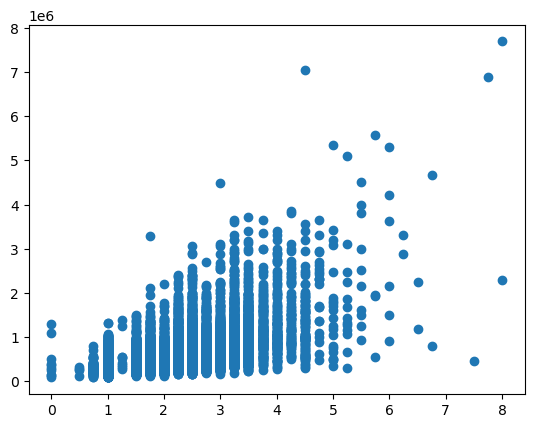

In [19]:
plt.scatter(data_new['bathrooms'],data_new['price'])

<Axes: xlabel='bathrooms'>

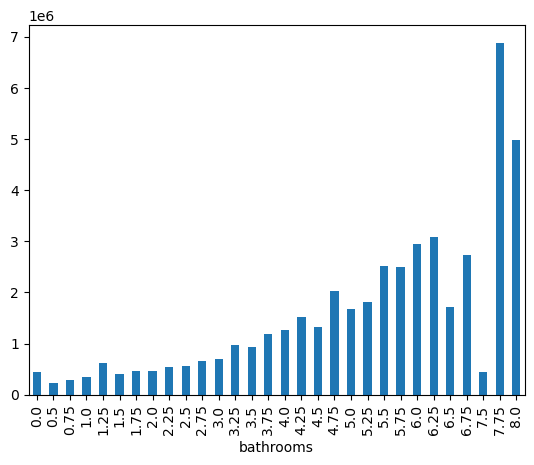

In [23]:
data_new.groupby('bathrooms').mean()['price'].plot.bar()

<Axes: xlabel='bathrooms'>

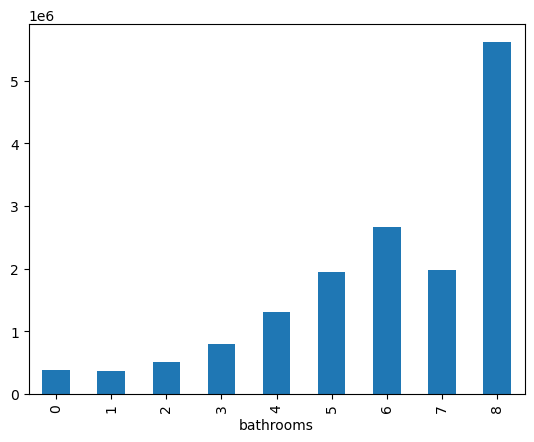

In [33]:
def trans_int(x):
    if x-int(x) <= 0.5:
        return int(x)
    else:
        return int(x)+1

data_new['bathrooms'].apply(trans_int)

data_new1 = data_new.copy()
data_new1['bathrooms'] = data_new['bathrooms'].apply(trans_int)

data_new1.groupby('bathrooms').mean()['price'].plot.bar()

In [34]:
import seaborn as sn

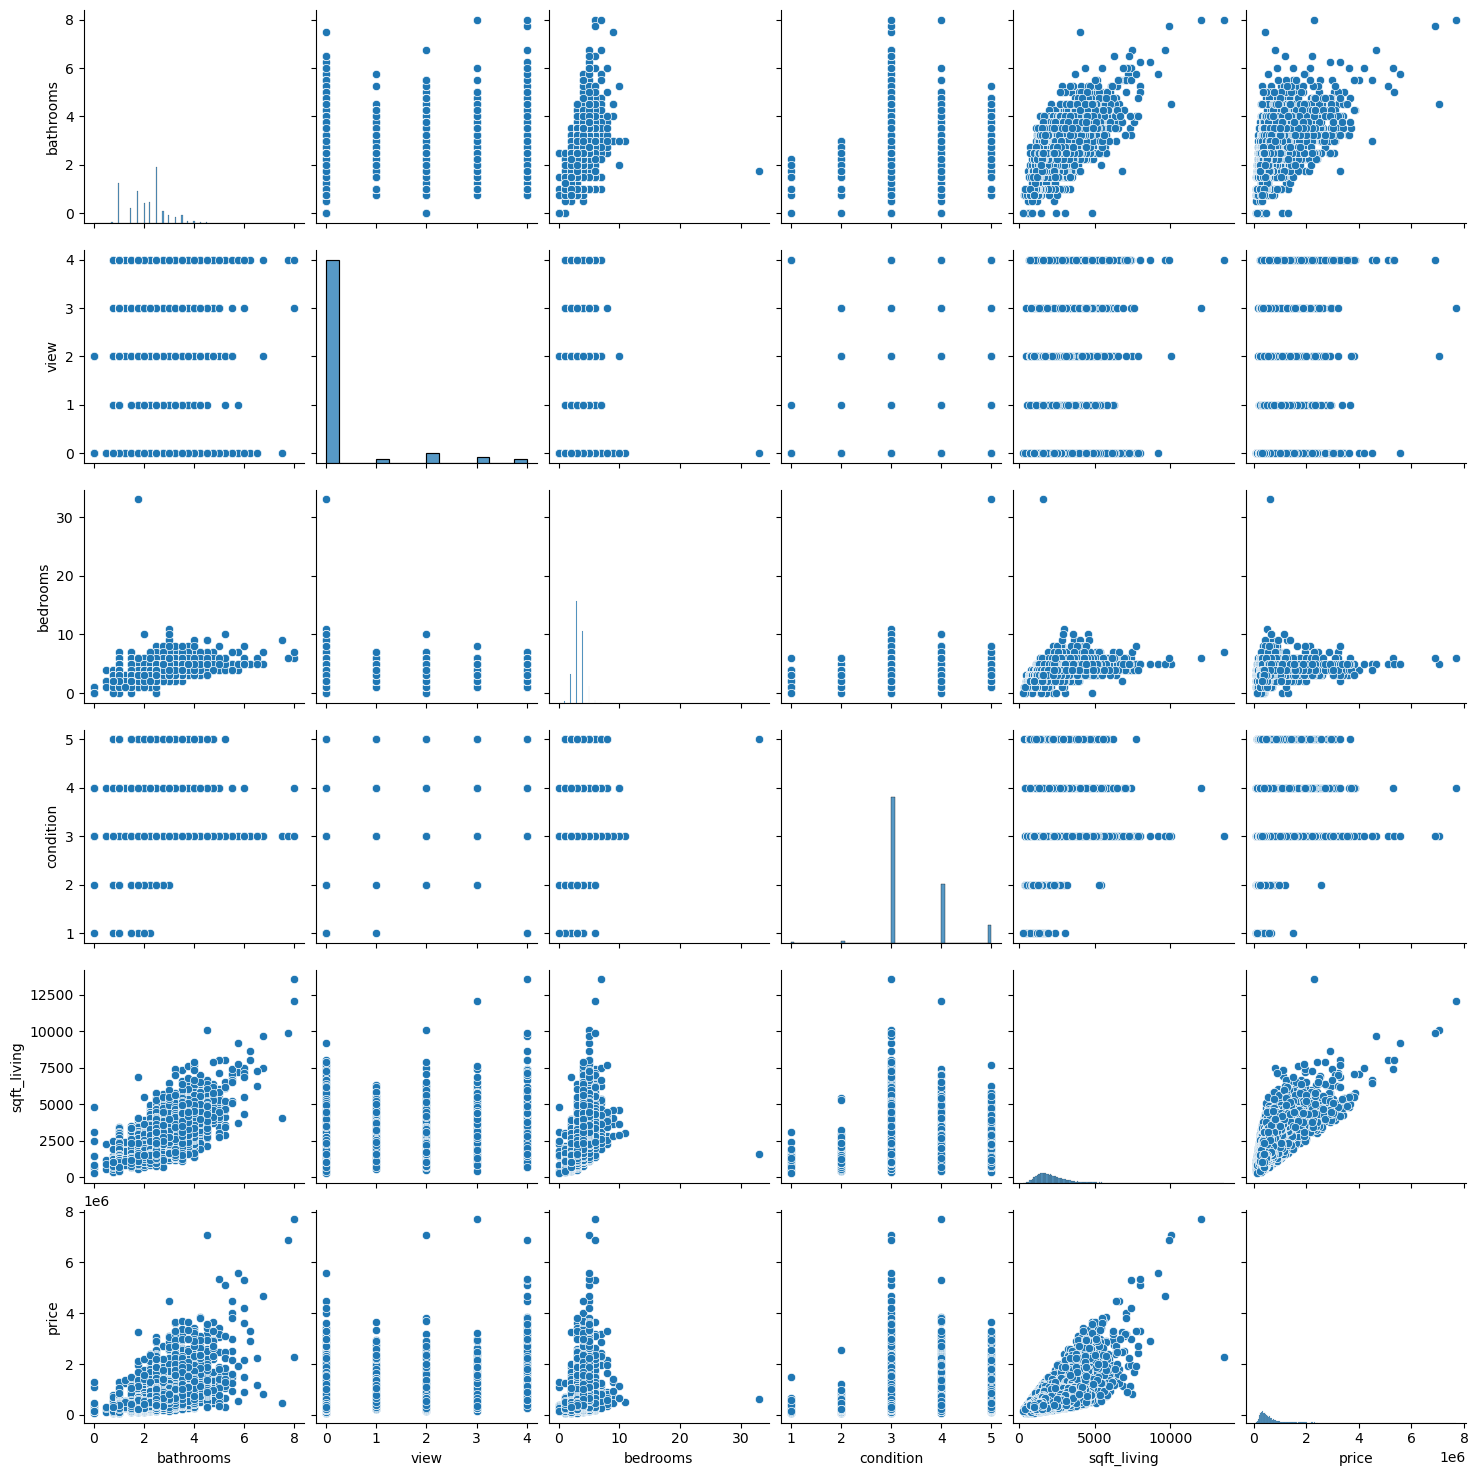

In [36]:
sn.pairplot(data_new)

## 预测模型

In [37]:
data_new

bathrooms  view  bedrooms  condition  sqft_living     price
0           1.00     0         3          3         1180  221900.0
1           2.25     0         3          3         2570  538000.0
2           1.00     0         2          3          770  180000.0
3           3.00     0         4          5         1960  604000.0
4           2.00     0         3          3         1680  510000.0
...          ...   ...       ...        ...          ...       ...
21608       2.50     0         3          3         1530  360000.0
21609       2.50     0         4          3         2310  400000.0
21610       0.75     0         2          3         1020  402101.0
21611       2.50     0         3          3         1600  400000.0
21612       0.75     0         2          3         1020  325000.0

[21613 rows x 6 columns]

In [39]:
from sklearn.linear_model import LinearRegression

X = data_new[['bathrooms','sqft_living']]
y = data_new['price']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [40]:
model.coef_

array([-5164.60042317,   283.89187322])

In [41]:
model.intercept_

-39456.61390604777

$$Price = w_1 Bath + w_2 Living + w_0$$
$w1,w2,w3 = -5164.6,283,-39456.6$

In [42]:
model.predict(X)

array([290371.1960665 , 678525.14930877, 173975.52804765, ...,
       246239.64645762, 401858.88218276, 246239.64645762])

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

price_pred = model.predict(X)
r2_score(data_new['price'],price_pred)

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

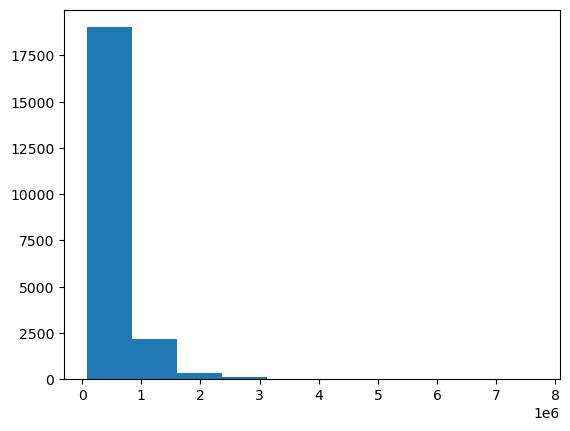

In [45]:
plt.hist(data_new['price'])

<Axes: >

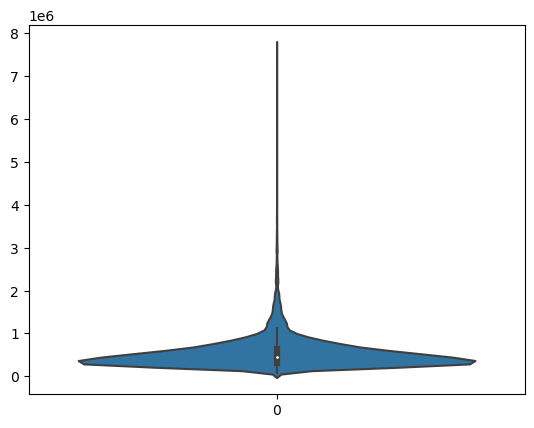

In [46]:
sn.violinplot(data_new['price'])

In [50]:
# 决策树
from sklearn.tree import DecisionTreeRegressor

X = data_new[['bathrooms','sqft_living']]
y = data_new['price']

model = DecisionTreeRegressor(max_depth=3)
model.fit(X,y)
from sklearn.metrics import r2_score, mean_absolute_error

price_pred = model.predict(X)
r2_score(data_new['price'],price_pred)

0.5318762954682534

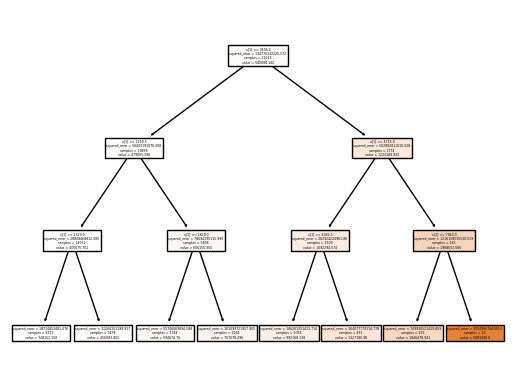

In [53]:
from sklearn.tree import plot_tree
plot_tree(model,filled=True)
plt.show()